## Direct impact
### Projects aiming at refugees[Done]
* Check precentage of refugess aimed projects in donorschoose = 1.5%
    * Checking number of funded projects directly aimed at refugees 
    > 15k for querying in system
    * Total number of funded projects in donorschoose
    > 1.2 million

* Check percentage for refugees in kids in USA = 0.5%
    * Population of US- 328,863,150
    * Percentage of kids(<14)- 18%
    * Total number of refugees from 2001- 895,000
    * Fraction of kids in refugees- 34%
    
    
https://www.smithsonianmag.com/history/by-numbers-united-states-refugees-180962487/







## Indirect impact
### 1. Covering refugee cities using density of refugee population density resettlement data[Done]
* Number of students per school/ per city
* Number of refugees per city
* Number of refugees kids per city
* Funding per school/per city
* Assumption that refugee kids go to school using the survey attendance response
* Check if donorschoose is funding more in refugee dense areas
* Check how many schools of the refugee density cities we are serving

### 2. Building if a school would be refugee school[TODO]
* Using survey as verification rather than learning
* Make heuristic if a projects floated from a school are refugee-like schools and verify with survey
* See how many of the refugee school exists
* See how many of them have recieved funding 



## 1: Covering refugee cities results

<a href="https://ibb.co/dEQn2f"><img src="https://preview.ibb.co/fn0LNf/output-refugee.png" alt="output-refugee" border="0"></a>

In [1]:
!ls data/

donorschooseorg_challenge_2012_resettlement_data.csv
donorschooseorg_challenge_2013_resettlement_data.csv
donorschooseorg_challenge_2014_resettlement_data.csv
donorschooseorg_challenge_2015_resettlement_data.csv
donorschooseorg_challenge_2018_resettlement_data.csv
donorschooseorg_challenge_donation.csv
donorschooseorg_challenge_donor_supplemental.csv
donorschooseorg_challenge_project.csv
donorschooseorg_challenge_resource.csv
donorschooseorg_challenge_school.csv
donorschooseorg_challenge_teacher_survey.csv


In [699]:
!du -sh data/*

 12K	data/donorschooseorg_challenge_2012_resettlement_data.csv
 12K	data/donorschooseorg_challenge_2013_resettlement_data.csv
 12K	data/donorschooseorg_challenge_2014_resettlement_data.csv
 12K	data/donorschooseorg_challenge_2015_resettlement_data.csv
 16K	data/donorschooseorg_challenge_2018_resettlement_data.csv
244M	data/donorschooseorg_challenge_donation.csv
104M	data/donorschooseorg_challenge_donor_supplemental.csv
2.0G	data/donorschooseorg_challenge_project.csv
841M	data/donorschooseorg_challenge_resource.csv
7.1M	data/donorschooseorg_challenge_school.csv
316K	data/donorschooseorg_challenge_teacher_survey.csv
4.4M	data/refugees_count_9yr.csv
364K	data/sample.txt
4.0K	data/sample_bigger_files.sh
102M	data/sample_donorschooseorg_challenge_project.csv
 84M	data/sample_donorschooseorg_challenge_resource.csv
4.5M	data/school_student_nums.csv
  0B	data/tmp.csv
1.0M	data/tmp.txt


In [3]:
#boilerplate
%matplotlib inline
import pandas as pd
import numpy as np
import json
import os
from datetime import datetime
from IPython.display import display, Image, HTML
from glob import iglob
import traceback
import copy

import matplotlib
matplotlib.style.use('ggplot')
pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

import time
import warnings
warnings.filterwarnings('ignore')

In [7]:
#read data
schools = pd.read_csv('data/donorschooseorg_challenge_school.csv', index_col=0)

In [44]:
schools.shape

(69395, 10)

In [9]:
schools.head(5)

,school_hashed_id,school_address_state,school_address_city,school_address_district,school_dist_percent_ell_students,school_bilingual_prgm,school_esl_prgm,school_dist_number_ell_students,school_metro_type,school_percentage_free_lunch
0,d9c07a2b76b79d658cb62ce39f73b1da,Wisconsin,Eau Claire,Eau Claire Area School Dist,3.0,No,No,3.0,urban,40.0
1,146f2ec953a680ab8eb9bd8ce5b59868,South Carolina,Sumter,Sumter School District,NaN,No,No,3.0,urban,76.0
2,6b380bfdbe5a964711fe883d1bfb26df,Illinois,Chicago,Chicago Psd-Network 5,NaN,No,No,3.0,urban,95.0
3,682b672958a49aef821db0a716a98577,New York,New York City,New York City Dept Of Ed,1.0,No,No,3.0,urban,82.0
4,043f2e6bc8b60312359ca90aa8a01d62,Florida,Molino,Escambia Co School District,1.0,No,No,3.0,rural,62.0


In [20]:
list(project.columns)

['Unnamed: 0',
 'project_hashed_id',
 'project_title',
 'project_essay_one',
 'project_essay_two',
 'project_cost',
 'project_posted_date',
 'project_funded_date',
 'project_impact_letter',
 'project_subj_cat_tree',
 'project_subj_subcat_tree',
 'project_grade_cat',
 'project_resource_type',
 'teacher_hashed_id',
 'school_hashed_id']

In [23]:
project = pd.read_csv('data/donorschooseorg_challenge_project.csv', index_col=0, usecols=[0, 1, 2, 5, 6, 7, 9, 10, 11, 12, 13, 14], parse_dates=["project_posted_date", "project_funded_date"])

In [27]:
project.head(5)

,project_hashed_id,project_title,project_cost,project_posted_date,project_funded_date,project_subj_cat_tree,project_subj_subcat_tree,project_grade_cat,project_resource_type,teacher_hashed_id,school_hashed_id
0,e80079d9de118490d37643fa6dadd806,Words are the Beginning to So Many Journeys!,357.60,2018-11-01,NaT,Literacy & Language,Literature & Writing,Grades 3-5,materials,6684cc9bb4d8be1d99722d4273f7bee2,cfc1e0138960a65cd27b166cf67d9e8b
1,f98c0bebcd7aa0df8a5965ad9f35c57d,Spice Up Our Technology!,201.22,2018-11-01,NaT,Math & Science,"Applied Sciences, Environmental Science",Grades 3-5,materials,4102a4a99a540232d657d4789391ac36,9919d634d4edb19c3660dc3342e15da0
2,c7acba160590697707f4d6d58c512c08,Can You Build It?,622.75,2018-10-31,2018-10-31,Math & Science,Mathematics,Grades 9-12,materials,7e9fb443bfbeaaad89a93a4742efac75,a998da284b1b6edc3e8a2de59753675d
3,0f57de4cf57128dbd8a962d050f4f3e5,Putting the MUsic in MUtes - Trombone Edition,848.38,2018-10-31,2018-10-31,Music & The Arts,"Music, Performing Arts",Grades 9-12,materials,dc18c15a85115dfbba924b5eedd0e58e,c79bd65959038a6fbd03893b5f323339
4,0256a1fa7798d1680d6d3e5a43a777d2,Tablets for Differentiating Instruction,799.48,2018-10-31,2018-10-31,Literacy & Language,ESL,Grades PreK-2,materials,30faba25220bb299fc2e9825e6c89438,3b4a6df3881bdc2154d9b09e8a92e10d


In [29]:
project.count()

project_hashed_id           964408
project_title               964395
project_cost                964408
project_posted_date         964408
project_funded_date         677089
project_subj_cat_tree       964405
project_subj_subcat_tree    964405
project_grade_cat           964408
project_resource_type       964408
teacher_hashed_id           964408
school_hashed_id            964408
dtype: int64

In [30]:
project[['project_posted_date', 'project_funded_date']].describe()

,project_posted_date,project_funded_date
count,964408,677089
unique,1220,1220
top,2018-03-30 00:00:00,2018-03-27 00:00:00
freq,9012,35234
first,2015-07-01 00:00:00,2015-07-01 00:00:00
last,2018-11-01 00:00:00,2018-11-01 00:00:00


## Number of projects that got funded

In [32]:
count_stats = project.count()

In [35]:
print '{0} out of {1} = {2} %'.format(count_stats[4], count_stats[0], count_stats[4]*100.0/count_stats[0])

677089 out of 964408 = 70.2077336563 %


## Number of schools that got funded

In [47]:
num_school_funded = pd.merge(schools[['school_hashed_id']], project[['school_hashed_id', 'project_funded_date']], how='left', on='school_hashed_id').groupby(['school_hashed_id']).max().count()

In [658]:
print '{0} out of all schools(98100) got funded'.format(num_school_funded.iloc[0])

63685 out of all schools(98100) got funded


In [52]:
!ls

BI Exercise.ipynb                  Untitled.ipynb
Education-Challenge-master         data
Education-Challenge-master (1).zip


In [51]:
schools.shape

(69395, 10)

In [50]:
project.head(5)

,project_hashed_id,project_title,project_cost,project_posted_date,project_funded_date,project_subj_cat_tree,project_subj_subcat_tree,project_grade_cat,project_resource_type,teacher_hashed_id,school_hashed_id
0,e80079d9de118490d37643fa6dadd806,Words are the Beginning to So Many Journeys!,357.60,2018-11-01,NaT,Literacy & Language,Literature & Writing,Grades 3-5,materials,6684cc9bb4d8be1d99722d4273f7bee2,cfc1e0138960a65cd27b166cf67d9e8b
1,f98c0bebcd7aa0df8a5965ad9f35c57d,Spice Up Our Technology!,201.22,2018-11-01,NaT,Math & Science,"Applied Sciences, Environmental Science",Grades 3-5,materials,4102a4a99a540232d657d4789391ac36,9919d634d4edb19c3660dc3342e15da0
2,c7acba160590697707f4d6d58c512c08,Can You Build It?,622.75,2018-10-31,2018-10-31,Math & Science,Mathematics,Grades 9-12,materials,7e9fb443bfbeaaad89a93a4742efac75,a998da284b1b6edc3e8a2de59753675d
3,0f57de4cf57128dbd8a962d050f4f3e5,Putting the MUsic in MUtes - Trombone Edition,848.38,2018-10-31,2018-10-31,Music & The Arts,"Music, Performing Arts",Grades 9-12,materials,dc18c15a85115dfbba924b5eedd0e58e,c79bd65959038a6fbd03893b5f323339
4,0256a1fa7798d1680d6d3e5a43a777d2,Tablets for Differentiating Instruction,799.48,2018-10-31,2018-10-31,Literacy & Language,ESL,Grades PreK-2,materials,30faba25220bb299fc2e9825e6c89438,3b4a6df3881bdc2154d9b09e8a92e10d


In [698]:
project.iloc[project.project_title[project.project_title.notna()].str.contains('Refugees').index]

,project_hashed_id,project_title,project_cost,project_posted_date,project_funded_date,project_subj_cat_tree,project_subj_subcat_tree,project_grade_cat,project_resource_type,teacher_hashed_id,school_hashed_id
0,e80079d9de118490d37643fa6dadd806,Words are the Beginning to So Many Journeys!,357.60,2018-11-01,NaT,Literacy & Language,Literature & Writing,Grades 3-5,materials,6684cc9bb4d8be1d99722d4273f7bee2,cfc1e0138960a65cd27b166cf67d9e8b
1,f98c0bebcd7aa0df8a5965ad9f35c57d,Spice Up Our Technology!,201.22,2018-11-01,NaT,Math & Science,"Applied Sciences, Environmental Science",Grades 3-5,materials,4102a4a99a540232d657d4789391ac36,9919d634d4edb19c3660dc3342e15da0
2,c7acba160590697707f4d6d58c512c08,Can You Build It?,622.75,2018-10-31,2018-10-31,Math & Science,Mathematics,Grades 9-12,materials,7e9fb443bfbeaaad89a93a4742efac75,a998da284b1b6edc3e8a2de59753675d
3,0f57de4cf57128dbd8a962d050f4f3e5,Putting the MUsic in MUtes - Trombone Edition,848.38,2018-10-31,2018-10-31,Music & The Arts,"Music, Performing Arts",Grades 9-12,materials,dc18c15a85115dfbba924b5eedd0e58e,c79bd65959038a6fbd03893b5f323339
4,0256a1fa7798d1680d6d3e5a43a777d2,Tablets for Differentiating Instruction,799.48,2018-10-31,2018-10-31,Literacy & Language,ESL,Grades PreK-2,materials,30faba25220bb299fc2e9825e6c89438,3b4a6df3881bdc2154d9b09e8a92e10d
5,6a111e467123e39ad2712722d91aa7d5,Let's Play!,360.39,2018-10-31,2018-10-31,Health & Sports,Gym & Fitness,Grades PreK-2,materials,bc0338c05dcbb8aa2ecad6ce09307b24,608b02c98f1268e629e2d35e53f68248
6,b54d6705e634b52c220b7ad89bc5ade4,STEMulating Minds through Creation and Exploration,357.25,2018-10-31,NaT,"Math & Science, Applied Learning","Applied Sciences, Early Development",Grades PreK-2,materials,e25edc62fd052b4d2c813111ccb62303,2ece9271db874474fc5d0d32921cb64a
7,8e157e67f18976f32dbcbd02e69aa7ac,Reading With Milk Snorting Out of Your Nose!,171.20,2018-10-31,2018-10-31,Literacy & Language,Literacy,Grades PreK-2,materials,6799f0320edc8f4dac96d18c030afd0b,56dab97c719458498f1d4f159392ce20
8,25c4c066ff734586af7ae580044e6e26,Visual Learners Need a Document Camera,272.92,2018-10-31,2018-10-31,"Literacy & Language, Special Needs","Literature & Writing, Special Needs",Grades 3-5,materials,20d40079fa6d0921a3d5ab81e5544832,4503a0f04db431576a2e06dfdccff5e0
9,b233eb331b06a8eb31d0c842abc30420,Working Together,488.27,2018-10-31,2018-10-31,Math & Science,Mathematics,Grades 3-5,materials,5c510233630bbfdeeee2839cc1f239bb,6e15c91012c75f5c83e33a6d9baec443


In [711]:
(project.project_title[project.project_title.notna()].str.contains('Refugees') == True).where

ValueError: Array conditional must be same shape as self

In [692]:
sum(project.project_title[project.project_title.notna()].str.contains('Refugees'))

115

In [678]:
sum(project.project_title.str.contains('Refugees'))

nan

In [57]:
project.project_title[0:10].apply(lambda x: "Refugees" in x)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: project_title, dtype: bool

In [66]:
project.iloc[[0,1]]

,project_hashed_id,project_title,project_cost,project_posted_date,project_funded_date,project_subj_cat_tree,project_subj_subcat_tree,project_grade_cat,project_resource_type,teacher_hashed_id,school_hashed_id
0,e80079d9de118490d37643fa6dadd806,Words are the Beginning to So Many Journeys!,357.60,2018-11-01,NaT,Literacy & Language,Literature & Writing,Grades 3-5,materials,6684cc9bb4d8be1d99722d4273f7bee2,cfc1e0138960a65cd27b166cf67d9e8b
1,f98c0bebcd7aa0df8a5965ad9f35c57d,Spice Up Our Technology!,201.22,2018-11-01,NaT,Math & Science,"Applied Sciences, Environmental Science",Grades 3-5,materials,4102a4a99a540232d657d4789391ac36,9919d634d4edb19c3660dc3342e15da0


In [99]:
project_ref = project[~project.project_title.isna()]

In [103]:
len(project.project_title.str.contains('Refugee'))

964408

In [104]:
survey = pd.read_csv('data/donorschooseorg_challenge_teacher_survey.csv', index_col=0)

In [106]:
survey.q6a_refugee_attendance.value_counts()

About the same as non-refugee students    177
Better than non-refugee students          86 
Worse than non-refugee students           68 
Iâ€™m not sure                            47 
Name: q6a_refugee_attendance, dtype: int64

In [ ]:
survey

### Fun facts or insights
* Exaggaration factor: in number of students in their school in the survey
* Putting in a choropleth

In [110]:
survey.head(3)

,q1_num_students,q2_num_ell_students,q3_num_refugee_students,q4a_stud_parent_born_outside_us,q4b_stud_parent_refugee,q5a_ell_academic_perf,q5b_refugee_academic_perf,q6a_ell_attendance,q6a_refugee_attendance,q7a_ell_parent_meet,...,q8b_refugee_services_open_ended,q9a_external_ell_services,q9a_external_ell_services_open_ended,q9b_external_refugee_services,q9b_external_refugee_services_open_ended,q10_know_of_unhcr,q11_unhcr_support,q12_country_disp,q13_airbnb,school_hashed_id
teacher_hashed_id,,,,,,,,,,,,,,,,,,,,,
0010edf1d44001bf9fc01b98f362be3b,32,7,2,NaN,Yes,NaN,Much worse,NaN,About the same as non-refugee students,NaN,...,We have a pull out ELL program that works two times a week with small groups of students. The new non-English students receive this small group instructional/language support.,NaN,NaN,No,NaN,No,Yes,Syria,No,5489f195ae729d5f11a2472dbf948bab
0023a59fd8ac7b93f75c1506ccc4b9d8,21,3,1,NaN,Yes,NaN,Somewhat worse,NaN,About the same as non-refugee students,NaN,...,NaN,NaN,NaN,I'm not sure,NaN,No,Yes,Mexico,No,4acfc137da0fab397d43f7e514805378
004f58000b39e81aa5450af3c7b9e4a0,65,65,0,Yes,NaN,Somewhat worse,NaN,About the same as non-ELL students,NaN,About the same,...,NaN,Yes,"I'm not sure of the organizations. There are two ESL teachers in our school who have ELL students who may be refugees or have had their education interrupted. I've had discussions with these teachers about the outside organizations that assist their ELLs and families, however, I do not know the names of them.",NaN,NaN,No,Yes,Syria,Yes,e61343eeb861d494ed9bc742573caad0


## Exaggaration ratio

In [120]:
school_student_nums = pd.read_csv('data/school_student_nums.csv')

In [124]:
school_student_nums.assign(num_teachers=school_student_nums.enrollment/school_student_nums.stu_tchr_ratio).describe()

,enrollment,stu_tchr_ratio,num_teachers
count,92170.000000,84682.000000,84682.000000
mean,547.959900,15.834888,36.257291
std,447.060159,9.227590,25.905397
min,1.000000,1.000000,0.142857
25%,287.000000,13.000000,20.642857
50%,458.000000,15.000000,30.461538
75%,675.000000,18.000000,44.306856
max,17500.000000,1063.000000,960.000000


In [132]:
school_student_nums = school_student_nums.rename(columns={'md5':'school_hashed_id'})

In [134]:
exaggaration_check_df = pd.merge(left=survey.query('q3_num_refugee_students > 10 and q1_num_students>100')[['q1_num_students', 'school_hashed_id']],
         right=school_student_nums,
         on='school_hashed_id')

In [139]:
exaggaration_check_df.assign(exagg = exaggaration_check_df.q1_num_students/exaggaration_check_df.enrollment).query('exagg > 0.7').describe()

,q1_num_students,enrollment,stu_tchr_ratio,exagg
count,16.000000,16.000000,16.000000,16.000000
mean,724.062500,584.750000,16.562500,1.357241
std,310.967409,235.878924,3.424787,0.779312
min,285.000000,247.000000,11.000000,0.907821
25%,497.500000,415.000000,14.750000,0.991650
50%,700.000000,550.000000,16.500000,1.029290
75%,900.000000,736.500000,17.250000,1.170472
max,1400.000000,1132.000000,24.000000,3.643725


* Median Exaggaration factor by teachers when estimating their student size is 1.03

In [148]:
survey.query('q3_num_refugee_students > 10 and q1_num_students>100')[['q1_num_students', 'q3_num_refugee_students', 'school_hashed_id']]

,q1_num_students,q3_num_refugee_students,school_hashed_id
teacher_hashed_id,,,
005c6fa46707238674d02e2854ab76b8,400,30,9720437c28ce446ab21d65085482bfef
0560d01548d876935762310d26240359,145,21,19c7ea3780c201f8b8579c3c4e4fb661
0b0eb6aa1f8ac2b31306d1113fcaf1c4,800,40,8c267d83ee341cc7e6af1c2a5af0f0b9
0fe819e15f6ad7e0dd9b53706dbd1492,112,20,4054fc44880b21ba6a069c01ff79101c
246e37cf0e55010da0c9916d469b1a97,180,43,1c14d95c3a2cbcab23be9c8ed1b8ce4f
2b2387ff0d7ff276d980f0d2dcc8dc75,150,25,b4d004331974c723935e18d357e10e29
2b2c0d46b3efd752364f76ac49009eb8,160,20,5201d6eacbb01cf6ac574aaf2bcfe077
2dfda2e6d47e56330ae26072a590b0aa,110,20,7dbef5fe6eaf087449435d5935173d16
599416ccc3c9cd82679417bf359f2924,750,20,86d2030f5814734d6d6e2787b4eab1d6


In [455]:
survey_filtered_df = survey.query('q3_num_refugee_students > 5 and q1_num_students>100')[['q1_num_students', 'q3_num_refugee_students', 'school_hashed_id']]

In [462]:
school_surveyed = pd.merge(left=survey_filtered_df, right=schools[['school_hashed_id', 'school_address_state', 'school_address_city']], on='school_hashed_id', how='left')

In [152]:
schools.shape

(69395, 10)

In [157]:
school_student_nums.count()

school_hashed_id    121923
enrollment          92170 
stu_tchr_ratio      84682 
dtype: int64

* 30k missing values in school student counts

In [169]:
schools.shape

(69395, 10)

In [167]:
schools.school_address_city.count()

69182

In [164]:
schools_extended = pd.merge(left=school_student_nums, right=schools[['school_address_state', 'school_address_city', 'school_metro_type', 'school_percentage_free_lunch', 'school_hashed_id']], on='school_hashed_id')

## Number of Enrollment by cities

In [182]:
schools_extended[['school_address_state', 'school_address_city']].drop_duplicates().shape

(14642, 2)

In [183]:
schools_extended[['school_address_city']].drop_duplicates().shape

(10120, 1)

In [184]:
city_enrollments = schools_extended.groupby(['school_address_state', 'school_address_city'])['enrollment'].sum()

In [185]:
city_enrollments.describe()

count    14641.000000 
mean     2699.323339  
std      12745.919506 
min      0.000000     
25%      332.000000   
50%      720.000000   
75%      2049.000000  
max      967544.000000
Name: enrollment, dtype: float64

In [186]:
city_enrollments.nlargest(10)

school_address_state  school_address_city
New York              New York City          967544.0
Texas                 Houston                548224.0
Illinois              Chicago                366702.0
California            Los Angeles            291876.0
Texas                 San Antonio            271337.0
Nevada                Las Vegas              237244.0
Arizona               Phoenix                205823.0
Texas                 Dallas                 195075.0
Pennsylvania          Philadelphia           187717.0
Florida               Miami                  172325.0
Name: enrollment, dtype: float64

In [187]:
city_enrollments.nsmallest(100)

school_address_state  school_address_city
Alaska                Hyder                  0.0
Arkansas              Hot Springs Village    0.0
                      Plumerville            0.0
                      Scott                  0.0
California            Agua Dulce             0.0
                      Big Bear City          0.0
                      West Sacramen          0.0
Delaware              Lincoln                0.0
Florida               Babcock Ranch          0.0
                      Goulds                 0.0
                      Gretna                 0.0
                      North Lauderd          0.0
                      White Springs          0.0
Georgia               Brooks                 0.0
                      Eastanollee            0.0
Illinois              Ashkum                 0.0
                      Chana                  0.0
                      Danforth               0.0
                      Harristown             0.0
                      Ina  

### Number of refugees and their kids per city basis

In [193]:
!ls -lh Education-Challenge-master/data_primer/additional_resettlement_data/

total 17712
-rwxr-xr-x@ 1 magrawal  713033059   8.6M Nov  3 10:42 Arrivals by Destination and Nationality 2010-2018.csv
-rwxr-xr-x@ 1 magrawal  713033059     1B Nov  3 10:42 README.md
-rwxr-xr-x@ 1 magrawal  713033059   2.5K Nov  3 10:42 Refugee Arrivals by Age.csv


In [249]:
num_refugees_cities = pd.read_csv('data/refugees_count_9yr.csv')

In [250]:
num_refugees_cities.shape

(79155, 8)

In [251]:
num_refugees_cities['total_per_state_city'] = num_refugees_cities['total_per_state_city'].str.replace(',', '')

In [252]:
num_refugees_cities_ref = num_refugees_cities[['state', 'Assur_DestinationCity1', 'total_per_state_city']].dropna()

In [253]:
num_refugees_cities_ref['total_per_state_city'] = pd.to_numeric(num_refugees_cities_ref['total_per_state_city'], errors='coerce')

In [254]:
num_refugees_cities.dtypes

state                          object
calendar_year                  object
total_by_state                 object
nationality                    object
total_per_state_nationality    object
Assur_DestinationCity1         object
total_per_state_city           object
total_year                     object
dtype: object

In [255]:
num_refugees_cities_ref.columns = ['state', 'city', 'num_refugees']

In [323]:
num_refugees_cities_df = num_refugees_cities_ref.groupby(['state', 'city'])['num_refugees'].sum()

In [444]:
num_refugees_cities_df.num_refugees.sum()/8

55206

In [315]:
num_refugees_cities_df.describe()

count    2249.000000 
mean     196.377946  
std      936.101626  
min      1.000000    
25%      3.000000    
50%      7.000000    
75%      24.000000   
max      12219.000000
Name: num_refugees, dtype: float64

In [258]:
num_refugees_cities_df.nlargest(10)

state       city        
Arizona     Phoenix         12219
California  San Diego       11368
Georgia     Atlanta         10634
New York    Buffalo         10420
Indiana     Indianapolis    9812 
Illinois    Chicago         9546 
Colorado    Denver          9311 
Ohio        Columbus        9034 
Kentucky    Louisville      8525 
New York    Syracuse        7444 
Name: num_refugees, dtype: int64

In [261]:
num_refugees_cities_df.nsmallest(10)

state    city          
Alabama  Auburn            1
         Dadeville         1
         Guntersville      1
         Prattville        1
         Robertsdale       1
         Vestavia Hills    1
Alaska   Fairbanks         1
         Jber              1
Arizona  Bullhead City     1
         Flagstaff         1
Name: num_refugees, dtype: int64

In [268]:
refugee_demographic = pd.read_csv('Refugee Arrivals by Age.csv')[['Characteristic', 'Total', 'FiscalYear']]

In [273]:
refugee_demographic.dtypes

Characteristic    object
Total             object
FiscalYear        int64 
dtype: object

In [277]:
refugee_demographic['total_int'] = pd.to_numeric(refugee_demographic.Total.str.replace(',', ''))

In [280]:
refugee_demographic = refugee_demographic[['Characteristic', 'FiscalYear', 'total_int']]

In [288]:
refugee_demographic['Characteristic'] = refugee_demographic['Characteristic'].str.strip()

In [290]:
demographic_table = pd.pivot_table(refugee_demographic, values='total_int', index='Characteristic', columns= 'FiscalYear')

In [291]:
demographic_table

FiscalYear,2014,2015,2016
Characteristic,,,
1 to 4 years,6619,7689,9678
10 to 14 years,6616,7376,10364
15 to 19 years,6794,6886,8632
20 to 24 years,7304,6845,8148
25 to 29 years,7878,7409,7851
30 to 34 years,6730,6789,7700
35 to 39 years,4960,5192,5960
40 to 44 years,4263,3880,4355
45 to 49 years,3094,2849,3137


In [292]:
demographic_table/demographic_table.sum()

FiscalYear,2014,2015,2016
Characteristic,,,
1 to 4 years,0.094591,0.109969,0.113874
10 to 14 years,0.094548,0.105492,0.121945
15 to 19 years,0.097092,0.098484,0.101566
20 to 24 years,0.104380,0.097898,0.095871
25 to 29 years,0.112583,0.105964,0.092377
30 to 34 years,0.096177,0.097097,0.090600
35 to 39 years,0.070882,0.074256,0.070127
40 to 44 years,0.060922,0.055492,0.051242
45 to 49 years,0.044216,0.040747,0.036911


In [295]:
demographic_count_3yr = demographic_table.sum(axis=1)

In [299]:
demographic_count_3yr = pd.DataFrame(demographic_count_3yr).reset_index()

In [305]:
def apply_age_group(tmp_in):
    if tmp_in in ['1 to 4 years', '10 to 14 years', '5 to 9 years', 'Under 1 year']:
        return 'kid'
    else:
        return 'not_kid'

In [306]:
kid_count = demographic_count_3yr.assign(age_group=demographic_count_3yr.Characteristic.map(apply_age_group)).groupby('age_group')[0].sum()

In [309]:
kid_percentage = kid_count.iloc[0]*1.0/kid_count.sum()

In [310]:
kid_percentage

0.3403132281531812

In [324]:
num_refugees_cities_df = pd.DataFrame(num_refugees_cities_df)

In [325]:
num_refugees_cities_df['num_refugee_kids'] = num_refugees_cities_df['num_refugees']*kid_percentage

## Number of schools per city

In [428]:
city_school_counts = schools.groupby(['school_address_state', 'school_address_city'])['school_hashed_id'].count().rename('num_schools')

## Funding per city

In [338]:
schools.columns

Index([u'school_hashed_id', u'school_address_state', u'school_address_city',
       u'school_address_district', u'school_dist_percent_ell_students',
       u'school_bilingual_prgm', u'school_esl_prgm',
       u'school_dist_number_ell_students', u'school_metro_type',
       u'school_percentage_free_lunch'],
      dtype='object')

In [339]:
schools[['school_hashed_id', 'school_address_state', 'school_address_city', 'school_percentage_free_lunch']].head(5)

,school_hashed_id,school_address_state,school_address_city,school_percentage_free_lunch
0,d9c07a2b76b79d658cb62ce39f73b1da,Wisconsin,Eau Claire,40.0
1,146f2ec953a680ab8eb9bd8ce5b59868,South Carolina,Sumter,76.0
2,6b380bfdbe5a964711fe883d1bfb26df,Illinois,Chicago,95.0
3,682b672958a49aef821db0a716a98577,New York,New York City,82.0
4,043f2e6bc8b60312359ca90aa8a01d62,Florida,Molino,62.0


In [801]:
city_funding_df = pd.merge(left=project_ref[~project_ref.project_funded_date.isna()][['project_cost', 'school_hashed_id']], 
         right=schools[['school_hashed_id', 'school_address_state', 'school_address_city', 'school_percentage_free_lunch']],
         on='school_hashed_id',
         how='left').groupby(['school_address_state', 'school_address_city'])[['project_cost', 'school_hashed_id']].agg({'project_cost':'sum', 'school_hashed_id':'nunique'})

In [781]:
city_funding_total_df = pd.merge(left=project_ref[['project_cost', 'school_hashed_id', 'project_funded_date']], 
         right=schools[['school_hashed_id', 'school_address_state', 'school_address_city', 'school_percentage_free_lunch']],
         on='school_hashed_id',
         how='left').groupby(['school_address_state', 'school_address_city'])[['project_cost', 'school_hashed_id']].agg({'project_cost':['sum', 'count'],
                                                                                                                         'school_hashed_id':'nunique',
                                                                                                                         'project_funded_date': 'count'})

In [802]:
city_funding_df.shape

(13704, 2)

In [803]:
city_funding_total_df.shape

(14641, 4)

In [763]:
tmp_column_names = []
for i in city_funding_total_df.columns:
    tmp_column_names.append('_'.join(i))

In [735]:
city_funding_total_df.columns = tmp_column_names

In [804]:
city_funding_total_df.columns = ['total_sum_request', 'total_projects_request', 'total_school_request', 'total_projects_funded']

In [805]:
city_funding_df.columns = ['fund_sum', 'funded_school_count']

In [905]:
city_funding_total_df.head(5)

total_sum_request  \
school_address_state school_address_city                      
Alabama              Abbeville            7044.31             
                     Adamsville           13821.34            
                     Addison              177.93              
                     Alabaster            18282.64            
                     Albertville          244888.29           

                                          total_projects_request  \
school_address_state school_address_city                           
Alabama              Abbeville            16                       
                     Adamsville           21                       
                     Addison              1                        
                     Alabaster            28                       
                     Albertville          494                      

                                          total_school_request  \
school_address_state school_address_city                         
Alabama              Abbeville            1                      
                     Adamsville           2                      
                     Addison              1                      
                     Alabaster            3                      
                     Albertville          8                      

                                          total_projects_funded  
school_address_state school_address_city                         
Alabama              Abbeville            11                     
                     Adamsville           12                     
                     Addison              1                      
                     Alabaster            18                     
                     Albertville          250

In [806]:
city_funding_df = pd.concat([city_funding_df, city_funding_total_df], axis=1)

In [807]:
city_funding_df[city_funding_df.fund_sum.isnull()] = city_funding_df[city_funding_df.fund_sum.isnull()].fillna(0)

In [808]:
city_funding_df.shape

(14641, 6)

In [810]:
city_funding_df

fund_sum  funded_school_count  \
school_address_state school_address_city                                   
Alabama              Abbeville            3075.18    1.0                   
                     Adamsville           6282.90    2.0                   
                     Addison              177.93     1.0                   
                     Alabaster            9590.66    3.0                   
                     Albertville          106602.13  8.0                   
                     Alex City            3814.31    4.0                   
                     Alexandria           996.55     1.0                   
                     Aliceville           4783.20    2.0                   
                     Altoona              28432.65   1.0                   
                     Andalusia            10801.90   4.0                   
                     Anniston             119987.32  11.0                  
                     Arab                 2020.97    4.0                   
                     Ardmore              2490.01    1.0                   
                     Ariton               680.61     1.0                   
                     Ashford              3237.45    1.0                   
                     Ashland              3598.28    1.0                   
                     Ashville             1872.51    2.0                   
                     Athens               20657.31   12.0                  
                     Atmore               4112.83    3.0                   
                     Attalla              7770.57    3.0                   
                     Auburn               66797.11   11.0                  
                     Autaugaville         450.40     1.0                   
                     Axis                 9566.88    1.0                   
                     Baileyton            2062.66    1.0                   
                     Banks                1339.19    1.0                   
                     Bay Minette          9837.55    5.0                   
                     Bayou Labatre        5607.57    1.0                   
                     Beatrice             85456.15   1.0                   
                     Berry                279.06     1.0                   
                     Bessemer             29290.60   10.0                  
...                                          ...     ...                   
Wyoming              Jackson              4784.90    4.0                   
                     Kemmerer             441.07     1.0                   
                     Lander               33862.85   4.0                   
                     Laramie              28316.07   7.0                   
                     Lingle               613.48     1.0                   
                     Medicine Bow         1092.92    1.0                   
                     Mills                525.79     1.0                   
                     Moorcroft            18874.98   2.0                   
                     Mountain View        1214.08    1.0                   
                     Newcastle            896.87     1.0                   
                     Pine Bluffs          489.69     2.0                   
                     Pinedale             1150.07    1.0                   
                     Powell               385.91     1.0                   
                     Ranchester           0.00       0.0                   
                     Rawlins              2510.45    1.0                   
                     Riverton             710.54     1.0                   
                     Rock River           3017.44    1.0                   
                     Rock Springs         10959.71   7.0                   
                     Rozet                5056.32    1.0                   
                     Saratoga             6696.78    1.0                   
               

In [345]:
city_funding_df.describe()

count    1.464100e+04
mean     2.815743e+04
std      2.581172e+05
min      0.000000e+00
25%      9.802500e+02
50%      3.373480e+03
75%      1.199768e+04
max      2.149626e+07
Name: project_cost, dtype: float64

In [347]:
city_funding_df.nsmallest(10)

school_address_state  school_address_city
Alabama               Brundidge              0.0
                      Carbon Hill            0.0
                      Courtland              0.0
                      Dixons Mills           0.0
                      Elkmont                0.0
                      Eutaw                  0.0
                      Falkville              0.0
                      Georgiana              0.0
                      Grant                  0.0
                      Grove Hill             0.0
Name: project_cost, dtype: float64

# Combining num_refugees, funding, num_students

In [350]:
city_enrollments.head(5)

school_address_state  school_address_city
Alabama               Abbeville              389.0 
                      Adamsville             1321.0
                      Addison                287.0 
                      Alabaster              2325.0
                      Albertville            6097.0
Name: enrollment, dtype: float64

In [349]:
num_refugees_cities_df.head(5)

num_refugees  num_refugee_kids
state   city                                       
Alabama Albertville  5             1.701566        
        Auburn       1             0.340313        
        Bessemer     3             1.020940        
        Birmingham   11            3.743446        
        Dadeville    1             0.340313

In [351]:
city_funding_df.head(5)

school_address_state  school_address_city
Alabama               Abbeville              3075.18  
                      Adamsville             6282.90  
                      Addison                177.93   
                      Alabaster              9590.66  
                      Albertville            106602.13
Name: project_cost, dtype: float64

In [815]:
num_refugees_cities_df.shape

(2249, 2)

In [816]:
city_funding_df.shape

(14641, 6)

In [844]:
city_df = pd.concat([city_enrollments, num_refugees_cities_df, city_funding_df, city_school_counts], axis=1)

In [845]:
city_df = city_df.drop(city_df[city_df.enrollment.isnull()].index)

In [846]:
city_df = city_df.fillna(0)

In [847]:
city_df[city_df.enrollment.isnull()].shape

(0, 10)

In [848]:
city_df.head(5)

enrollment  num_refugees  num_refugee_kids   fund_sum  \
Alabama Abbeville    389.0       0.0           0.000000          3075.18     
        Adamsville   1321.0      0.0           0.000000          6282.90     
        Addison      287.0       0.0           0.000000          177.93      
        Alabaster    2325.0      0.0           0.000000          9590.66     
        Albertville  6097.0      5.0           1.701566          106602.13   

                     funded_school_count  total_sum_request  \
Alabama Abbeville    1.0                  7044.31             
        Adamsville   2.0                  13821.34            
        Addison      1.0                  177.93              
        Alabaster    3.0                  18282.64            
        Albertville  8.0                  244888.29           

                     total_projects_request  total_school_request  \
Alabama Abbeville    16.0                    1.0                    
        Adamsville   21.0                    2.0                    
        Addison      1.0                     1.0                    
        Alabaster    28.0                    3.0                    
        Albertville  494.0                   8.0                    

                     total_projects_funded  num_schools  
Alabama Abbeville    11.0                   1.0          
        Adamsville   12.0                   2.0          
        Addison      1.0                    1.0          
        Alabaster    18.0                   3.0          
        Albertville  250.0                  8.0

In [861]:
city_df = city_df.assign(refugee_ratio=city_df.num_refugee_kids/city_df.enrollment)
city_df = city_df.assign(funding_per_enrollment=city_df.fund_sum/city_df.enrollment)
city_df = city_df.assign(funded_schools=city_df.funded_school_count/city_df.total_school_request)
city_df = city_df.assign(fraction_projects = city_df.total_projects_funded/city_df.total_projects_request)

In [850]:
print city_df.num_schools.sum(), 98100

69182.0 98100


In [759]:
city_df.query('refugee_ratio>0.003').shape

(831, 13)

In [862]:
city_df.head(4)

enrollment  num_refugees  num_refugee_kids  fund_sum  \
Alabama Abbeville   389.0       0.0           0.0               3075.18    
        Adamsville  1321.0      0.0           0.0               6282.90    
        Addison     287.0       0.0           0.0               177.93     
        Alabaster   2325.0      0.0           0.0               9590.66    

                    funded_school_count  total_sum_request  \
Alabama Abbeville   1.0                  7044.31             
        Adamsville  2.0                  13821.34            
        Addison     1.0                  177.93              
        Alabaster   3.0                  18282.64            

                    total_projects_request  total_school_request  \
Alabama Abbeville   16.0                    1.0                    
        Adamsville  21.0                    2.0                    
        Addison     1.0                     1.0                    
        Alabaster   28.0                    3.0                    

                    total_projects_funded  num_schools  refugee_ratio  \
Alabama Abbeville   11.0                   1.0          0.0             
        Adamsville  12.0                   2.0          0.0             
        Addison     1.0                    1.0          0.0             
        Alabaster   18.0                   3.0          0.0             

                    funding_per_enrollment  funded_schools  fraction_projects  
Alabama Abbeville   7.905347                1.0             0.687500           
        Adamsville  4.756170                1.0             0.571429           
        Addison     0.619965                1.0             1.000000           
        Alabaster   4.125015                1.0             0.642857

In [778]:
city_df.shape

(15059, 13)

### Fractions of public schools funded in last few years

* 91.7% of schools listed on the platform got funded

In [851]:
city_df.funded_school_count.sum()/city_df.total_school_request.sum()

0.9176436573906758

* 64.7% of schools in USA got funded

In [852]:
city_df.funded_school_count.sum()*69182/98100/city_df.num_schools.sum()

0.6470744138634047

### Fractions of public schools in refugee cities funded in last few years

* 95.4% of schools in the 'refugee dense' cities listed on the platform got funded

In [863]:
city_df.query('refugee_ratio>0.004').funded_school_count.sum()/city_df.query('refugee_ratio>0.004').total_school_request.sum()

0.9548022598870056

* 67.3% of schools in the 'refugee dense' cities in USA got funded

In [864]:
city_df.query('refugee_ratio>0.004').funded_school_count.sum()*69182/98100/city_df.query('refugee_ratio>0.004').total_school_request.sum()

0.6733448516157271

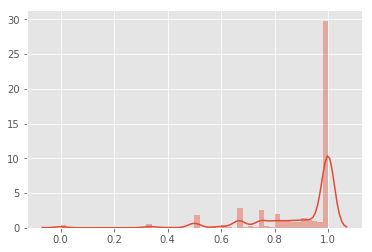

In [651]:
sns.distplot((city_df.query('enrollment > 1000').fund_count/city_df.query('enrollment > 1000').num_schools).fillna(0))

In [906]:
city_df.query('enrollment > 100').nsmallest(columns=['enrollment'], n=10)

,,enrollment,num_refugees,num_refugee_kids,fund_sum,funded_school_count,total_sum_request,total_projects_request,total_school_request,total_projects_funded,num_schools,refugee_ratio,funding_per_enrollment,funded_schools,fraction_projects
California,Loleta,101.0,0.0,0.0,13993.43,1.0,16904.88,9.0,1.0,7.0,1.0,0.0,138.548812,1.0,0.777778
Colorado,Anton,101.0,0.0,0.0,3358.89,1.0,3358.89,3.0,1.0,3.0,1.0,0.0,33.256337,1.0,1.000000
Idaho,Culdesac,101.0,0.0,0.0,7452.51,1.0,7452.51,18.0,1.0,18.0,1.0,0.0,73.787228,1.0,1.000000
Illinois,Carlock,101.0,0.0,0.0,627.98,1.0,627.98,2.0,1.0,2.0,1.0,0.0,6.217624,1.0,1.000000
Kansas,Madison,101.0,0.0,0.0,880.88,1.0,880.88,2.0,1.0,2.0,1.0,0.0,8.721584,1.0,1.000000
Maine,Athens,101.0,0.0,0.0,185.60,1.0,185.60,1.0,1.0,1.0,1.0,0.0,1.837624,1.0,1.000000
Michigan,Curtis,101.0,0.0,0.0,1358.29,1.0,1358.29,2.0,1.0,2.0,1.0,0.0,13.448416,1.0,1.000000
New Mexico,Polvadera,101.0,0.0,0.0,593.99,1.0,5784.20,8.0,1.0,1.0,1.0,0.0,5.881089,1.0,0.125000
Arizona,Bonita,102.0,0.0,0.0,0.00,0.0,497.28,1.0,1.0,0.0,1.0,0.0,0.000000,0.0,0.000000
Idaho,Hope,102.0,0.0,0.0,0.00,0.0,564.84,1.0,1.0,0.0,1.0,0.0,0.000000,0.0,0.000000


In [907]:
city_df.nlargest(columns=['enrollment'], n=10)

,,enrollment,num_refugees,num_refugee_kids,fund_sum,funded_school_count,total_sum_request,total_projects_request,total_school_request,total_projects_funded,num_schools,refugee_ratio,funding_per_enrollment,funded_schools,fraction_projects
New York,New York City,967544.0,0.0,0.000000,21496263.64,1847.0,37746450.50,47486.0,1944.0,32573.0,1944.0,0.000000,22.217350,0.950103,0.685950
Texas,Houston,548224.0,1865.0,634.684171,9924127.71,677.0,15032616.48,16825.0,699.0,12203.0,699.0,0.001158,18.102323,0.968526,0.725290
Illinois,Chicago,366702.0,9546.0,3248.630076,11409739.91,665.0,16960485.91,22217.0,678.0,17516.0,678.0,0.008859,31.114474,0.980826,0.788405
California,Los Angeles,291876.0,2731.0,929.395426,6064791.08,532.0,11858376.30,14750.0,570.0,9485.0,570.0,0.003184,20.778656,0.933333,0.643051
Texas,San Antonio,271337.0,597.0,203.166997,1290800.47,338.0,2104541.57,3274.0,368.0,2302.0,368.0,0.000749,4.757186,0.918478,0.703115
Nevada,Las Vegas,237244.0,4190.0,1425.912426,2356851.41,248.0,4851710.00,7043.0,260.0,4220.0,260.0,0.006010,9.934293,0.953846,0.599176
Arizona,Phoenix,205823.0,12219.0,4158.287335,1882296.37,276.0,3668372.46,4697.0,295.0,3214.0,295.0,0.020203,9.145219,0.935593,0.684267
Texas,Dallas,195075.0,1524.0,518.637360,2173803.11,297.0,4143490.25,5965.0,315.0,3936.0,315.0,0.002659,11.143422,0.942857,0.659849
Pennsylvania,Philadelphia,187717.0,5185.0,1764.524088,5042358.20,337.0,7963409.61,12358.0,342.0,9217.0,342.0,0.009400,26.861489,0.985380,0.745833
Florida,Miami,172325.0,4320.0,1470.153146,3506129.15,231.0,6242380.39,6684.0,239.0,4247.0,239.0,0.008531,20.346027,0.966527,0.635398


In [908]:
city_df.nlargest(columns=['num_refugee_kids'], n=10)

,,enrollment,num_refugees,num_refugee_kids,fund_sum,funded_school_count,total_sum_request,total_projects_request,total_school_request,total_projects_funded,num_schools,refugee_ratio,funding_per_enrollment,funded_schools,fraction_projects
Arizona,Phoenix,205823.0,12219.0,4158.287335,1882296.37,276.0,3668372.46,4697.0,295.0,3214.0,295.0,0.020203,9.145219,0.935593,0.684267
California,San Diego,152871.0,11368.0,3868.680778,2401338.04,252.0,3590507.55,4767.0,259.0,3597.0,259.0,0.025307,15.708264,0.972973,0.754563
Georgia,Atlanta,85272.0,10634.0,3618.890868,3699681.40,137.0,6678758.87,6874.0,145.0,4634.0,145.0,0.042439,43.386826,0.944828,0.674134
New York,Buffalo,45849.0,10420.0,3546.063837,449540.64,74.0,828429.68,1642.0,79.0,1066.0,79.0,0.077342,9.804808,0.936709,0.649208
Indiana,Indianapolis,142002.0,9812.0,3339.153395,3867337.97,243.0,6387969.11,10136.0,251.0,7217.0,251.0,0.023515,27.234391,0.968127,0.712017
Illinois,Chicago,366702.0,9546.0,3248.630076,11409739.91,665.0,16960485.91,22217.0,678.0,17516.0,678.0,0.008859,31.114474,0.980826,0.788405
Colorado,Denver,89323.0,9311.0,3168.656467,1411544.18,193.0,1888738.08,2389.0,204.0,2018.0,204.0,0.035474,15.802696,0.946078,0.844705
Ohio,Columbus,73921.0,9034.0,3074.389703,1145955.25,178.0,1734309.05,2997.0,186.0,2248.0,186.0,0.041590,15.502432,0.956989,0.750083
Kentucky,Louisville,90627.0,8525.0,2901.170270,1284596.67,143.0,2505545.06,3013.0,149.0,1911.0,149.0,0.032012,14.174547,0.959732,0.634252
New York,Syracuse,24261.0,7444.0,2533.291670,155306.41,37.0,251462.99,363.0,40.0,272.0,40.0,0.104418,6.401484,0.925000,0.749311


In [435]:
city_df.nlargest(columns=['project_cost'], n =10)

,,enrollment,num_refugees,num_refugee_kids,project_cost,num_schools,refugee_ratio,funding_per_enrollment
New York,New York City,967544.0,0.0,0.000000,21496263.64,1944.0,0.000000,22.217350
Illinois,Chicago,366702.0,9546.0,3248.630076,11409739.91,678.0,0.008859,31.114474
Texas,Houston,548224.0,1865.0,634.684171,9924127.71,699.0,0.001158,18.102323
California,Los Angeles,291876.0,2731.0,929.395426,6064791.08,570.0,0.003184,20.778656
Pennsylvania,Philadelphia,187717.0,5185.0,1764.524088,5042358.20,342.0,0.009400,26.861489
Oklahoma,Oklahoma City,80515.0,998.0,339.632602,4065722.04,150.0,0.004218,50.496455
Indiana,Indianapolis,142002.0,9812.0,3339.153395,3867337.97,251.0,0.023515,27.234391
Georgia,Atlanta,85272.0,10634.0,3618.890868,3699681.40,145.0,0.042439,43.386826
Florida,Miami,172325.0,4320.0,1470.153146,3506129.15,239.0,0.008531,20.346027
California,Oakland,51725.0,1441.0,490.391362,3223264.71,142.0,0.009481,62.315412


In [878]:
city_df.query('enrollment > 1000').query('refugee_ratio > 0.001').query('funded_school_count==0')

,,enrollment,num_refugees,num_refugee_kids,fund_sum,funded_school_count,total_sum_request,total_projects_request,total_school_request,total_projects_funded,num_schools,refugee_ratio,funding_per_enrollment,funded_schools,fraction_projects
New York,Spencerport,1251.0,6.0,2.041879,0.0,0.0,5352.2,7.0,3.0,0.0,3.0,0.001632,0.0,0.0,0.0


In [909]:
city_df.query('enrollment > 1000').query('refugee_ratio > 0.01').sort_values('funded_schools').head(5)

,,enrollment,num_refugees,num_refugee_kids,fund_sum,funded_school_count,total_sum_request,total_projects_request,total_school_request,total_projects_funded,num_schools,refugee_ratio,funding_per_enrollment,funded_schools,fraction_projects
California,Tujunga,2285.0,276.0,93.926451,43321.83,2.0,76032.94,94.0,4.0,71.0,4.0,0.041106,18.959225,0.500000,0.755319
New Jersey,Linden,4412.0,165.0,56.151683,2078.44,4.0,4604.96,9.0,7.0,4.0,7.0,0.012727,0.471088,0.571429,0.444444
Illinois,Glen Ellyn,3705.0,403.0,137.146231,10857.48,4.0,18927.00,33.0,6.0,23.0,6.0,0.037017,2.930494,0.666667,0.696970
Florida,Palm Springs,3682.0,570.0,193.978540,26002.26,2.0,51142.29,92.0,3.0,51.0,3.0,0.052683,7.061993,0.666667,0.554348
California,Antelope,8520.0,369.0,125.575581,15923.94,7.0,48929.85,64.0,10.0,31.0,10.0,0.014739,1.869007,0.700000,0.484375


In [910]:
city_df.head(5)

enrollment  num_refugees  num_refugee_kids   fund_sum  \
Alabama Abbeville    389.0       0.0           0.000000          3075.18     
        Adamsville   1321.0      0.0           0.000000          6282.90     
        Addison      287.0       0.0           0.000000          177.93      
        Alabaster    2325.0      0.0           0.000000          9590.66     
        Albertville  6097.0      5.0           1.701566          106602.13   

                     funded_school_count  total_sum_request  \
Alabama Abbeville    1.0                  7044.31             
        Adamsville   2.0                  13821.34            
        Addison      1.0                  177.93              
        Alabaster    3.0                  18282.64            
        Albertville  8.0                  244888.29           

                     total_projects_request  total_school_request  \
Alabama Abbeville    16.0                    1.0                    
        Adamsville   21.0                    2.0                    
        Addison      1.0                     1.0                    
        Alabaster    28.0                    3.0                    
        Albertville  494.0                   8.0                    

                     total_projects_funded  num_schools  refugee_ratio  \
Alabama Abbeville    11.0                   1.0          0.000000        
        Adamsville   12.0                   2.0          0.000000        
        Addison      1.0                    1.0          0.000000        
        Alabaster    18.0                   3.0          0.000000        
        Albertville  250.0                  8.0          0.000279        

                     funding_per_enrollment  funded_schools  fraction_projects  
Alabama Abbeville    7.905347                1.0             0.687500           
        Adamsville   4.756170                1.0             0.571429           
        Addison      0.619965                1.0             1.000000           
        Alabaster    4.125015                1.0             0.642857           
        Albertville  17.484358               1.0             0.506073

In [911]:
city_df.query('enrollment > 10').nlargest(columns=['refugee_ratio'], n=10).sort_values('funded_schools')

enrollment  num_refugees  num_refugee_kids  \
Michigan      Southfield        9387.0      4200.0        1429.315558        
              Troy              10018.0     3361.0        1143.792760        
North Dakota  Fargo             7071.0      2907.0        989.290554         
New York      Utica             7113.0      3229.0        1098.871414        
California    Glendale          16921.0     6500.0        2212.035983        
Georgia       Clarkston         3519.0      4129.0        1405.153319        
New Hampshire Concord           2619.0      1827.0        621.752268         
South Dakota  Huron             1293.0      818.0         278.376221         
Michigan      Farmington Hills  509.0       243.0         82.696114          
Massachusetts South Boston      2679.0      920.0         313.088170         

                                 fund_sum  funded_school_count  \
Michigan      Southfield        31507.48   14.0                  
              Troy              49232.55   17.0                  
North Dakota  Fargo             45866.57   14.0                  
New York      Utica             5079.92    8.0                   
California    Glendale          133258.86  19.0                  
Georgia       Clarkston         24045.00   3.0                   
New Hampshire Concord           2403.08    2.0                   
South Dakota  Huron             1160.19    3.0                   
Michigan      Farmington Hills  7131.49    2.0                   
Massachusetts South Boston      173962.47  7.0                   

                                total_sum_request  total_projects_request  \
Michigan      Southfield        61664.43           81.0                     
              Troy              125529.11          140.0                    
North Dakota  Fargo             66203.35           96.0                     
New York      Utica             12616.55           23.0                     
California    Glendale          282396.27          304.0                    
Georgia       Clarkston         46402.73           55.0                     
New Hampshire Concord           7825.08            12.0                     
South Dakota  Huron             3175.12            5.0                      
Michigan      Farmington Hills  14706.67           26.0                     
Massachusetts South Boston      234300.26          230.0                    

                                total_school_request  total_projects_funded  \
Michigan      Southfield        17.0                  53.0                    
              Troy              20.0                  83.0                    
North Dakota  Fargo             16.0                  73.0                    
New York      Utica             9.0                   13.0                    
California    Glendale          21.0                  188.0                   
Georgia       Clarkston         3.0                   40.0                    
New Hampshire Concord           2.0                   7.0                     
South Dakota  Huron             3.0                   3.0                     
Michigan      Farmington Hills  2.0                   21.0                    
Massachusetts South Boston      7.0                   180.0                   

                                num_schools  refugee_ratio  \
Michigan      Southfield        17.0         0.152265        
              Troy              20.0         0.114174        
North Dakota  Fargo             16.0         0.139908        
New York      Utica             9.0          0.154488        
California    Glendale          21.0         0.130727        
Georgia       Clarkston         3.0          0.399305        
New Hampshire Concord           2.0          0.237401        
South Dakota  Huron             3.0          0.215295        
Michigan      Farmington Hills  2.0          0.162468        
Massachusetts South Boston      7.0          0.116868        

                                funding_per_e

In [437]:
city_df.query('enrollment > 100').query('refugee_ratio>0.0000001').describe()

,enrollment,num_refugees,num_refugee_kids,project_cost,num_schools,refugee_ratio,funding_per_enrollment
count,1827.000000,1827.000000,1827.000000,1.827000e+03,1827.000000,1827.000000,1827.000000
mean,10463.742748,233.336617,79.407538,1.301314e+05,16.503010,0.005175,8.911615
std,25421.196543,1030.670204,350.750704,5.051891e+05,40.272353,0.018083,11.676929
min,136.000000,1.000000,0.340313,0.000000e+00,1.000000,0.000011,0.000000
25%,1863.500000,3.000000,1.020940,5.984395e+03,3.000000,0.000261,2.571745
50%,4534.000000,7.000000,2.382193,2.466083e+04,7.000000,0.000716,5.416192
75%,9871.500000,27.500000,9.358614,8.519344e+04,14.000000,0.002491,10.589158
max,548224.000000,12219.000000,4158.287335,1.140974e+07,699.000000,0.399305,153.409162


In [439]:
city_df.query('enrollment > 10000').nlargest(columns=['funding_per_enrollment'], n=10)

enrollment  num_refugees  num_refugee_kids  \
New Jersey    Camden         13958.0     334.0         113.664618         
Massachusetts Dorchester     14486.0     59.0          20.078480          
              Worcester      27393.0     3298.0        1122.353026        
California    Oakland        51725.0     1441.0        490.391362         
              Richmond       14850.0     10.0          3.403132           
Connecticut   Bridgeport     23713.0     394.0         134.083412         
California    Livermore      14187.0     12.0          4.083759           
              San Francisco  56104.0     296.0         100.732716         
New Jersey    Trenton        14708.0     158.0         53.769490          
Oklahoma      Oklahoma City  80515.0     998.0         339.632602         

                             project_cost  num_schools  refugee_ratio  \
New Jersey    Camden         1445743.47    52.0         0.008143        
Massachusetts Dorchester     1021433.11    34.0         0.001386        
              Worcester      1926412.39    56.0         0.040972        
California    Oakland        3223264.71    142.0        0.009481        
              Richmond       919160.30     31.0         0.000229        
Connecticut   Bridgeport     1444160.17    49.0         0.005654        
California    Livermore      761341.96     20.0         0.000288        
              San Francisco  2891933.44    124.0        0.001795        
New Jersey    Trenton        743851.38     38.0         0.003656        
Oklahoma      Oklahoma City  4065722.04    150.0        0.004218        

                             funding_per_enrollment  
New Jersey    Camden         103.578125              
Massachusetts Dorchester     70.511743               
              Worcester      70.324988               
California    Oakland        62.315412               
              Richmond       61.896316               
Connecticut   Bridgeport     60.901622               
California    Livermore      53.664761               
              San Francisco  51.545940               
New Jersey    Trenton        50.574611               
Oklahoma      Oklahoma City  50.496455

In [715]:
city_df.query('enrollment > 100').nlargest(columns=['refugee_ratio'], n=20)

,,enrollment,num_refugees,num_refugee_kids,fund_sum,fund_count,num_schools,refugee_ratio,funding_per_enrollment
Georgia,Clarkston,3519.0,4129.0,1405.153319,24045.00,3.0,3.0,0.399305,6.832907
New Hampshire,Concord,2619.0,1827.0,621.752268,2403.08,2.0,2.0,0.237401,0.917556
South Dakota,Huron,1293.0,818.0,278.376221,1160.19,3.0,3.0,0.215295,0.897285
Michigan,Farmington Hills,509.0,243.0,82.696114,7131.49,2.0,2.0,0.162468,14.010786
New York,Utica,7113.0,3229.0,1098.871414,5079.92,8.0,9.0,0.154488,0.714174
Michigan,Southfield,9387.0,4200.0,1429.315558,31507.48,14.0,17.0,0.152265,3.356502
North Dakota,Fargo,7071.0,2907.0,989.290554,45866.57,14.0,16.0,0.139908,6.486575
California,Glendale,16921.0,6500.0,2212.035983,133258.86,19.0,21.0,0.130727,7.875354
Massachusetts,South Boston,2679.0,920.0,313.088170,173962.47,7.0,7.0,0.116868,64.935599
Michigan,Troy,10018.0,3361.0,1143.792760,49232.55,17.0,20.0,0.114174,4.914409


Text(0,0.5,u'number of cities')

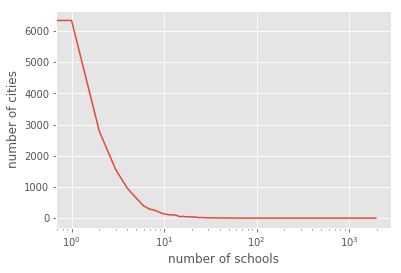

In [474]:
city_df.num_schools.value_counts().sort_index().plot(logx=True)
plt.xlabel('number of schools')
plt.ylabel('number of cities')

In [578]:
city_df.query('enrollment>100').refugee_ratio.shape

(14059,)

In [579]:
sum(city_df.query('enrollment>100').num_refugees > 30)

431

In [592]:
city_df.query('enrollment > 10').nlargest(columns=['num_refugee_kids'], n=100).num_refugee_kids.sum()

123134.17408975295

In [593]:
city_df.num_refugee_kids.sum()

150300.69846676508

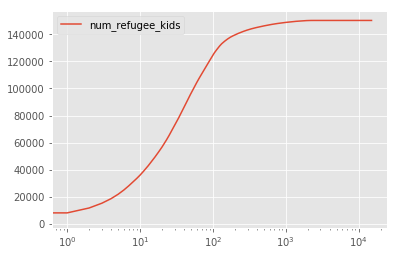

In [590]:
city_df.num_refugee_kids.sort_values(ascending=False).reset_index().cumsum().plot(logx=True)

In [583]:
sum(city_df.query('enrollment>100').refugee_ratio>0.003)

409

In [509]:
city_df.num_schools

Alabama  Abbeville        1.0 
         Adamsville       2.0 
         Addison          1.0 
         Alabaster        3.0 
         Albertville      8.0 
         Alex City        4.0 
         Alexandria       1.0 
         Aliceville       2.0 
         Altoona          1.0 
         Andalusia        4.0 
         Anniston         14.0
         Arab             4.0 
         Ardmore          1.0 
         Ariton           1.0 
         Ashford          2.0 
         Ashland          1.0 
         Ashville         2.0 
         Athens           12.0
         Atmore           3.0 
         Attalla          4.0 
         Auburn           12.0
         Autaugaville     1.0 
         Axis             1.0 
         Baileyton        1.0 
         Banks            1.0 
         Bay Minette      5.0 
         Bayou Labatre    1.0 
         Beatrice         1.0 
         Berry            1.0 
         Bessemer         11.0
                          ... 
Wyoming  Jackson          4.0 
        

In [572]:
city_df['student_size'] = pd.cut(city_df.enrollment, bins=[0, 1000, 10000, 100000, 1000000], include_lowest=True, labels=[
     '0-1k', '1k-10k', '10k-100k', '100k-'
])

In [573]:
city_df.query('enrollment>10') \
        .groupby(['student_size'])[['refugee_ratio']] \
        .quantile([0.25, 0.5, 0.75, 0.90, 0.95]).reset_index() \
        .pivot(index='student_size', columns='level_1', values='refugee_ratio')

level_1,0.25,0.5,0.75,0.9,0.95
student_size,,,,,
0-1k,0.000000,0.000000,0.000000,0.000000,0.000000
1k-10k,0.000000,0.000000,0.000000,0.000665,0.001779
10k-100k,0.000000,0.000132,0.000817,0.012009,0.028558
100k-,0.002029,0.006010,0.013058,0.019746,0.023184


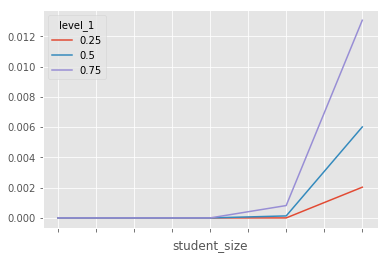

In [560]:
city_df.query('enrollment>10') \
        .groupby(['student_size'])[['refugee_ratio']] \
        .quantile([0.25,  0.50, 0.75]).reset_index() \
        .pivot(index='student_size', columns='level_1', values='refugee_ratio') \
        .plot(kind='line')
# ax.set_xticklabels(df.C)

In [469]:
city_df.query('num_schools == 1 and num_refugees > 0').shape

(162, 7)

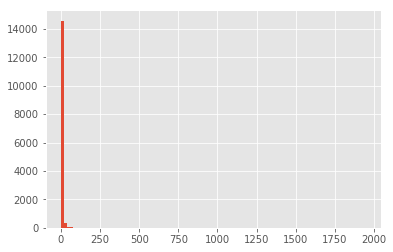

In [441]:
city_df.num_schools.hist(bins=100)

(0, 23000)

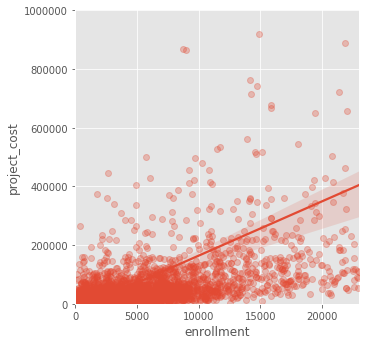

In [390]:
sns.lmplot(data=city_df, x='enrollment', y='project_cost',x_jitter=0.1, y_jitter=0.1, scatter_kws={'alpha':0.3})

plt.ylim(0, 1000000)
plt.xlim(0, 23000)

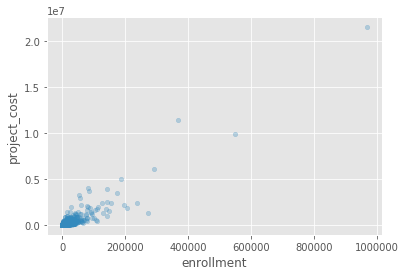

In [370]:
city_df.plot(x='enrollment', y='project_cost', kind='scatter', alpha=0.3)